In [1]:
#papermill parameters
saturn_base="$(homedir())/workspace"
lcfta_base="$(homedir())/work"
base=lcfta_base

dataset_directory = "$(base)/sars-cov2-pangenome-analysis/data/sars-cov-2.annotated.complete.refseq"
# dataset_directory = "$(base)/sars-cov2-pangenome-analysis/data/sars-cov-2.annotated.complete"
# dataset_directory = "$(base)/sars-cov2-pangenome-analysis/data/sars-cov-2"

"/home/jovyan/work/sars-cov2-pangenome-analysis/data/sars-cov-2.annotated.complete.refseq"

In [25]:
import Pkg
Pkg.update()

pkgs = [
    "Revise",
    "MetaGraphs",
    "Graphs",
    "JSON"
]

for pkg in pkgs
    try
        eval(Meta.parse("import $pkg"))
    catch
        Pkg.add(pkg)
        eval(Meta.parse("import $pkg"))
    end
end

# Pkg.add(url="https://github.com/cjprybol/Mycelia.git", rev="master")
import Mycelia

    Updating registry at `/opt/julia/registries/General`
  No Changes to `~/work/Mycelia/Project.toml`
  No Changes to `~/work/Mycelia/Manifest.toml`
Precompiling project...
  ✓ Mycelia
  1 dependency successfully precompiled in 19 seconds (254 already precompiled)
  1 dependency precompiled but a different version is currently loaded. Restart julia to access the new version


In [3]:
data_directory = joinpath(dataset_directory, "ncbi_dataset", "data")

"/home/jovyan/work/sars-cov2-pangenome-analysis/data/sars-cov-2.annotated.complete.refseq/ncbi_dataset/data"

In [4]:
fastx_files = filter(x -> occursin("genomic.fna", x), readdir(data_directory, join=true))

1-element Vector{String}:
 "/home/jovyan/work/sars-cov2-pangenome-analysis/data/sars-cov-2.annotated.complete.refseq/ncbi_dataset/data/genomic.fna"

In [ ]:
# import BioSequences
# import FASTX
# import Kmers

In [57]:
graph = Mycelia.initialize_graph()
graph = Mycelia.add_fastx_to_graph!(graph, fastx_files)

LoadError: ':identifier' index already contains NC_045512.2

In [14]:
# add fastx metadata to graphs

In [37]:
data_report_json_file = joinpath(data_directory, "data_report.jsonl")
data_report_json = JSON.parse(open(data_report_json_file))
identifier_to_data_report = Dict(data_report_json["accession"] => data_report_json)
Mycelia.add_metadata_to_graph!(graph, identifier_to_data_report)

In [56]:
# for (key, value) in graph.vprops[1]
#     println(key)
#     println(value)
#     println()
# end

In [78]:
function add_biosample_to_graph!(graph, biosample_json)
    try
        graph[biosample_json["identifier"], :identifier]
        @info "node $(biosample_json["identifier"]) already present"
    catch
        Graphs.add_vertex!(graph)
        vertex_id = Graphs.nv(graph)

        MetaGraphs.set_prop!(graph, vertex_id, :TYPE, "BIOSAMPLE")
        for (key, value) in biosample_json
            MetaGraphs.set_prop!(graph, vertex_id, Symbol(key), value)
        end
    end
    return graph
end

function add_biosamples_to_graph!(graph, biosample_json_file)
    open(biosample_json_file) do io
        # for i in 1:1
            # line = readline(io)
        for line in eachline(io)
            jsonl = JSON.parse(line)
            jsonl["attributes"] = Dict(attribute["name"] => attribute["value"] for attribute in jsonl["attributes"])
            jsonl["identifier"] = jsonl["accession"]
            add_biosample_to_graph!(graph, jsonl)
        end
    end
end

add_biosamples_to_graph! (generic function with 1 method)

In [ ]:
biosample_json_file = joinpath(data_directory, "biosample.jsonl")
add_biosamples_to_graph!(graph, biosample_json_file)
# @time biosample_json = JSON.parse(open(biosample_json_file))

kmer_type = Kmers.Kmer{BioSequences.DNAAlphabet{2}, 3, 1}
(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 123], [0, 1, 7, 29, 32], false)


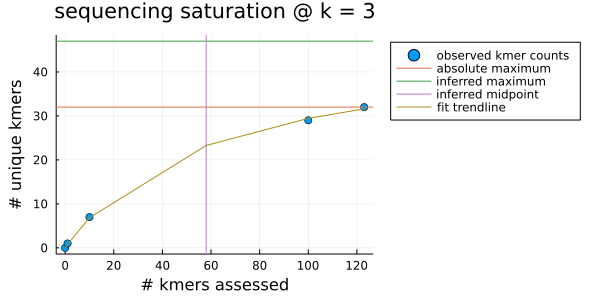

  4.425143 seconds (9.45 M allocations: 545.523 MiB, 4.28% gc time, 99.65% compilation time)
(k, predicted_saturation) = (3, 1.46875)
kmer_type = Kmers.DNAKmer{5, 1}


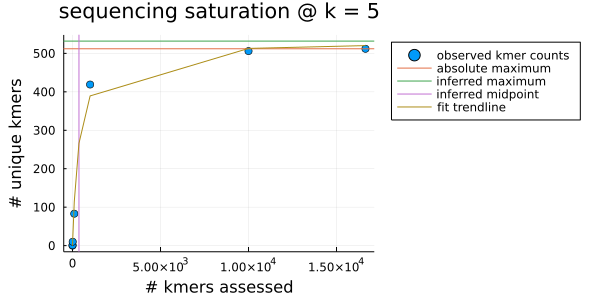

(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 10000, 16646], [0, 1, 10, 83, 419, 506, 512], false)
  0.000072 seconds (335 allocations: 37.000 KiB)
(k, predicted_saturation) = (5, 1.0390625)
kmer_type = Kmers.DNAKmer{7, 1}
(sampling_points, kmer_counts, hit_eof) = 

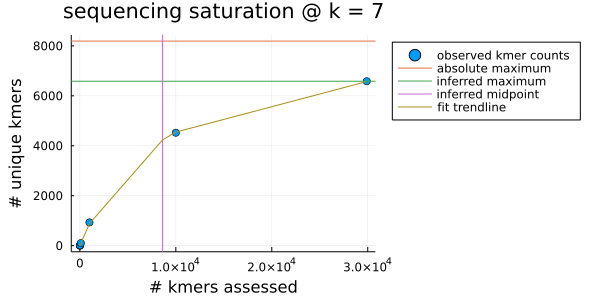

([0, 1, 10, 100, 1000, 10000, 29897], [0, 1, 10, 99, 929, 4522, 6583], true)
  0.000063 seconds (256 allocations: 28.031 KiB)
(k, predicted_saturation) = (7, 0.8035888671875)
kmer_type = Kmers.DNAKmer{11, 1}


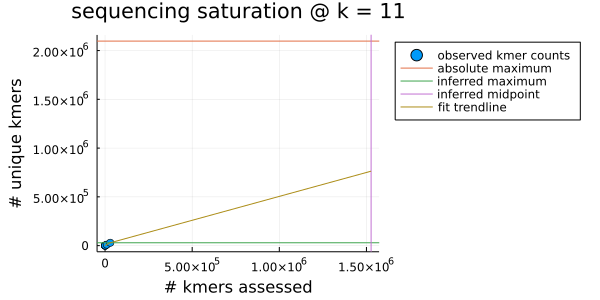

(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 10000, 29893], [0, 1, 10, 100, 999, 9935, 29319], true)
  0.000071 seconds (379 allocations: 41.906 KiB)
(k, predicted_saturation) = (11, 0.013980388641357422)
chosen k = 11


11

In [40]:
# kmer_size = Mycelia.assess_dnamer_saturation(fastx_files)